In [68]:
import os
import pandas as pd
import numpy as np
import sys
import torch
import torch
import torch.nn as nn

In [46]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [47]:
device

device(type='cuda')

In [48]:
os.getcwd()

'/home/alexg/ML_mutational_learning'

In [49]:
os.chdir("..")

In [50]:
os.getcwd()

'/home/alexg'

In [51]:
sys.path.append('./scripts/')

In [52]:
from scripts.train import training

In [53]:
from scripts.models import CNNModel
from scripts.data import get_desc

In [10]:
DIR_NAME = './data/ab/'

In [11]:
train_name = 'train.csv.gz'
test_name = 'test.csv.gz'

In [12]:
train_path = os.path.join(DIR_NAME, train_name)
test_path = os.path.join(DIR_NAME, test_name)


In [13]:
train_path

'./data/ab/train.csv.gz'

In [14]:
train = pd.read_csv(train_path,  compression='gzip')

In [15]:
test = pd.read_csv(test_path,  compression='gzip')

In [16]:
train.head()

,junction_aa,v_call,consensus_count,j_call,clonal_frequency,Label,Distance,Antibody,repr
0,KNEGFNCYIPLVTYGFHTTTGVSY,IGHV_RBD,1,IGHJ_RBD,0.000028,0,7,LY16,[[ 0.0000000e+00 0.0000000e+00 0.0000000e+00...
1,KNKGFNCYSPITEYGFFPTNGKNF,IGHV_RBD,2,IGHJ_RBD,0.000093,1,9,LY16,[[ 0.0000000e+00 0.0000000e+00 0.0000000e+00...
2,SKQGFNCYCPLIGYGFQRTFGVGW,IGHV_RBD,1,IGHJ_RBD,0.000028,0,9,LY16,[[ 0.0000000e+00 0.0000000e+00 0.0000000e+00...
3,KNRQFNCYWPLVRYGFWTTSGVGW,IGHV_RBD,1,IGHJ_RBD,0.000028,0,9,LY16,[[ 0.0000000e+00 0.0000000e+00 0.0000000e+00...
4,KNPGFNCYLPLGHYGFQPTNGRDF,IGHV_RBD,3,IGHJ_RBD,0.000140,1,7,LY16,[[ 0.00000000e+00 0.00000000e+00 0.00000000e...


In [17]:
train['repr'] = get_desc(train)

In [18]:
test['repr'] = get_desc(test)

In [19]:
test.head()

,junction_aa,v_call,consensus_count,j_call,clonal_frequency,Label,Distance,Antibody,repr
0,KNTGFNCYFPLLAYGFHPTSGVDY,IGHV_RBD,1,IGHJ_RBD,0.000063,0,6,LY16,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,KNPGFNCYHPIVGYGFQPTIGHDF,IGHV_RBD,1,IGHJ_RBD,0.000047,1,9,LY16,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,TTAGFNCYMPITRYGFWPTDGRSW,IGHV_RBD,1,IGHJ_RBD,0.000028,0,12,LY16,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,RNRGFNCYDPIHKYGFHRTNGLNY,IGHV_RBD,1,IGHJ_RBD,0.000047,1,10,LY16,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,KNKKFNCYVPLVTYGFHPTNGVNY,IGHV_RBD,1,IGHJ_RBD,0.000028,0,7,LY16,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [20]:
train.head()

,junction_aa,v_call,consensus_count,j_call,clonal_frequency,Label,Distance,Antibody,repr
0,KNEGFNCYIPLVTYGFHTTTGVSY,IGHV_RBD,1,IGHJ_RBD,0.000028,0,7,LY16,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,KNKGFNCYSPITEYGFFPTNGKNF,IGHV_RBD,2,IGHJ_RBD,0.000093,1,9,LY16,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,SKQGFNCYCPLIGYGFQRTFGVGW,IGHV_RBD,1,IGHJ_RBD,0.000028,0,9,LY16,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,KNRQFNCYWPLVRYGFWTTSGVGW,IGHV_RBD,1,IGHJ_RBD,0.000028,0,9,LY16,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,KNPGFNCYLPLGHYGFQPTNGRDF,IGHV_RBD,3,IGHJ_RBD,0.000140,1,7,LY16,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [21]:
def make_map():
    mapp_ = {}
    for i, ab in enumerate(train['Antibody'].unique()):
        mapp_[ab] = i
    return mapp_

In [22]:
mapp_ = make_map()

In [23]:
def func_(x):
    pos = mapp_[x['Antibody']]
    features = x['repr']
    ab_feature = np.zeros((24, 1))
    ab_feature[pos] = 1
    features = np.concatenate((ab_feature, features), axis=1)
    return features

In [24]:
train['repr'] = train.apply(func_, axis=1)

In [25]:
test['repr'] = test.apply(func_, axis=1)

Specify the target antibodies

In [26]:
target_ab = 'REGN33'

In [27]:
SEED = 42

In [28]:
def get_data(target_ab, train, test, frac = 0.3):
    target_df = train.loc[train['Antibody'] == target_ab]
    rest_df = train.loc[train['Antibody'] != target_ab]
    target_test = test.loc[test['Antibody'] == target_ab]
    
    sample_target = target_df.sample(frac=frac, random_state=SEED)
    
    train_target = sample_target.iloc[:25000, :]
    valid_target = sample_target.iloc[25000:, :]
    
    return train_target, valid_target, target_test, rest_df

In [29]:
train_target, valid_target, target_test, rest_df = get_data(target_ab, train, test)

Первый вариант - сначала просто другие антитела в обучении. 

In [30]:
from torch.utils.data import Dataset, DataLoader

In [31]:
rest_df.head()

,junction_aa,v_call,consensus_count,j_call,clonal_frequency,Label,Distance,Antibody,repr
0,KNEGFNCYIPLVTYGFHTTTGVSY,IGHV_RBD,1,IGHJ_RBD,0.000028,0,7,LY16,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,KNKGFNCYSPITEYGFFPTNGKNF,IGHV_RBD,2,IGHJ_RBD,0.000093,1,9,LY16,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,SKQGFNCYCPLIGYGFQRTFGVGW,IGHV_RBD,1,IGHJ_RBD,0.000028,0,9,LY16,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,KNRQFNCYWPLVRYGFWTTSGVGW,IGHV_RBD,1,IGHJ_RBD,0.000028,0,9,LY16,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,KNPGFNCYLPLGHYGFQPTNGRDF,IGHV_RBD,3,IGHJ_RBD,0.000140,1,7,LY16,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [32]:
class Data(Dataset):
    def __init__(self, df):
        self.df = df
    
    def __len__(self):
        return len(self.df)
    
    
    def __getitem__(self, idx):
        feature = self.df.repr.iloc[idx]
        label = self.df.Label.iloc[idx]
        return feature, label

In [33]:
from collections import defaultdict

In [35]:
def prepare_dataloader(df, batch_size= 5, shuffle=True, collate_fn = None):
    dataset = Data(df)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=2, collate_fn=collate_fn)
    return dataloader

In [36]:
trainloader = prepare_dataloader(rest_df, shuffle=True)

In [37]:
validloader = prepare_dataloader(valid_target, shuffle=False)

In [38]:
testloader = prepare_dataloader(target_test, shuffle=False)

Попробовать разные стратегии обучения

1) Подавать антитела равномерно на каждой эпохе 
2) Последовательно

In [39]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [54]:
model = CNNModel(41, 100).to(device)

In [55]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
num_epochs = 12

In [56]:
device

device(type='cuda')

In [57]:
loss_train_hist, loss_valid_hist = training(model, criterion, optimizer, num_epochs, trainloader, validloader)

100%|██████████| 12/12 [06:45<00:00, 33.83s/it]


In [58]:
from scripts.evaluate import plot_loss, evaluate_model

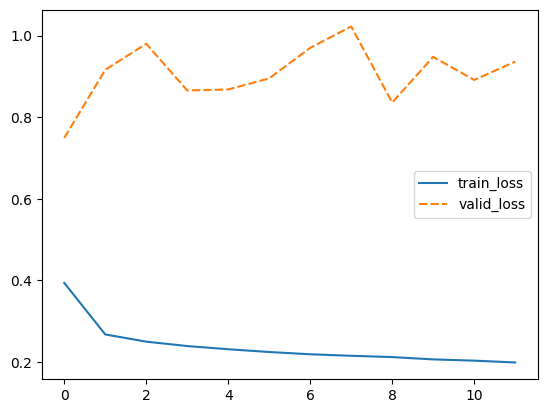

In [59]:
plot_loss(loss_train_hist, loss_valid_hist)

In [60]:
evaluate_model(testloader, model)

,accuracy,recall,precision,f1_scor,auc
0,0.555289,0.257982,0.634821,0.366873,0.622816


##### Все другие антитела +  10000  таргентого антитела

In [52]:
train_target.shape  # (25000 - объектов)

(25000, 9)

In [63]:
s1 = train_target.iloc[:10000, :]

In [66]:
add_train = pd.concat([s1, rest_df])

In [68]:
trainloader = prepare_dataloader(add_train, shuffle=True)

In [69]:
model = CNNModel(41, 100).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
num_epochs = 12
loss_train_hist, loss_valid_hist = training(model, criterion, optimizer, num_epochs, trainloader, validloader)

100%|██████████| 12/12 [08:54<00:00, 44.57s/it]


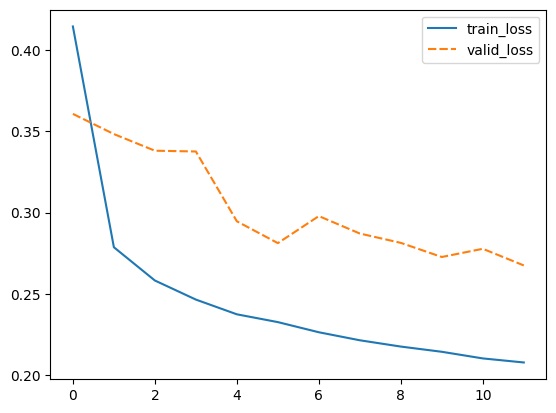

In [70]:
plot_loss(loss_train_hist, loss_valid_hist)

In [71]:
evaluate_model(testloader, model)

,accuracy,recall,precision,f1_scor,auc
0,0.889197,0.867186,0.906882,0.88659,0.958959


In [82]:
s2 = train_target.iloc[:17000, :]
add_train = pd.concat([s2, rest_df])
trainloader = prepare_dataloader(add_train, shuffle=True)

In [75]:
model = CNNModel(41, 100).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
num_epochs = 12
loss_train_hist, loss_valid_hist = training(model, criterion, optimizer, num_epochs, trainloader, validloader)

100%|██████████| 12/12 [09:48<00:00, 49.04s/it]


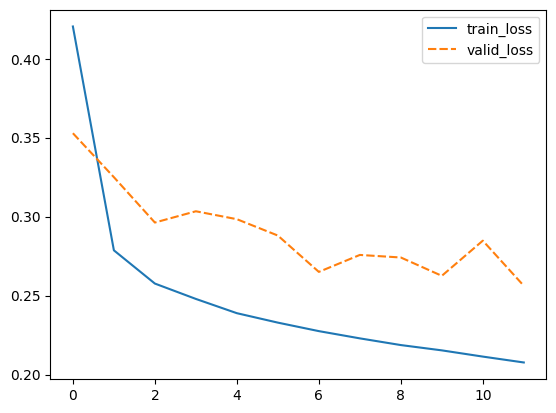

In [76]:
plot_loss(loss_train_hist, loss_valid_hist)

In [77]:
evaluate_model(testloader, model)

,accuracy,recall,precision,f1_scor,auc
0,0.902748,0.899265,0.905373,0.902309,0.963091


### Обучение на  всех 0.3 данных тарегентого антитела + всех антител.

In [78]:
s3 = train_target.iloc[:, :]
add_train = pd.concat([s3, rest_df])
trainloader = prepare_dataloader(add_train, shuffle=True)

In [79]:
model = CNNModel(41, 100).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
num_epochs = 12
loss_train_hist, loss_valid_hist = training(model, criterion, optimizer, num_epochs, trainloader, validloader)

100%|██████████| 12/12 [11:02<00:00, 55.19s/it]


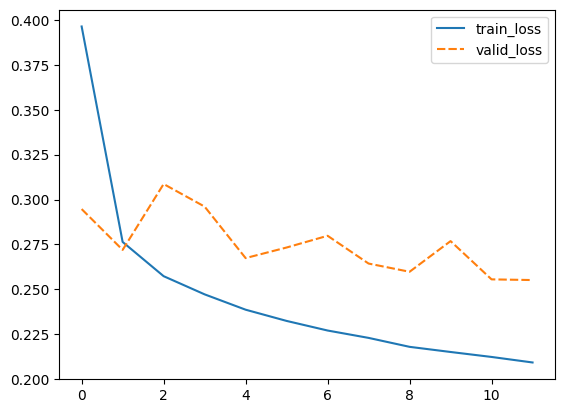

In [80]:
plot_loss(loss_train_hist, loss_valid_hist)

In [81]:
evaluate_model(testloader, model)

,accuracy,recall,precision,f1_scor,auc
0,0.897207,0.866437,0.923028,0.893837,0.965941


Добавление новых данных таргета увлечили precision но упустили recall

### Обучение только на 0.3 данных таргентого антитела.

In [63]:
trainloader = prepare_dataloader(train_target, shuffle=True)

In [65]:
model = CNNModel(41, 100).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
num_epochs = 12
loss_train_hist, loss_valid_hist = training(model, criterion, optimizer, num_epochs, trainloader)

100%|██████████| 12/12 [02:08<00:00, 10.72s/it]


In [66]:
evaluate_model(testloader, model)

,accuracy,recall,precision,f1_scor,auc
0,0.90694,0.89297,0.91844,0.905526,0.967691


#### Можно попробовать разные варианты порядка подачи данных в сетку

##### 1. Сначала использовать данные других антител, потом добивать таргентым. 

####  И порядок: 
1. Сначала миксованнные антитела + тарегет 



In [75]:
trainloader_1 = prepare_dataloader(rest_df, shuffle=True)
trainloader_2 = prepare_dataloader(train_target, shuffle=True)

In [76]:
model = CNNModel(41, 100).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
num_epochs = 12
loss_train_hist, loss_valid_hist = training(model, criterion, optimizer, num_epochs, trainloader_1, validloader)

100%|██████████| 12/12 [06:50<00:00, 34.17s/it]


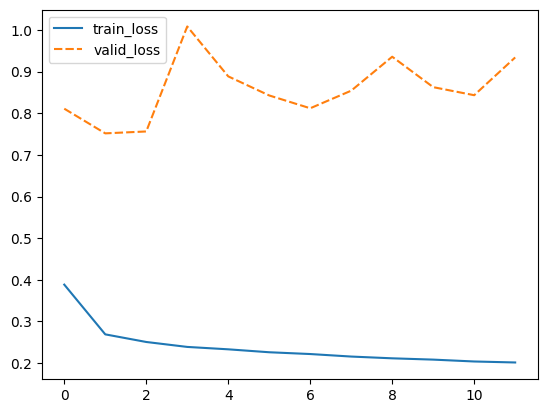

In [77]:
plot_loss(loss_train_hist, loss_valid_hist)

In [78]:
evaluate_model(testloader, model)

,accuracy,recall,precision,f1_scor,auc
0,0.615932,0.391845,0.708977,0.504731,0.729928


In [79]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
num_epochs = 12
loss_train_hist, loss_valid_hist = training(model, criterion, optimizer, num_epochs, trainloader_2, validloader)

100%|██████████| 12/12 [02:50<00:00, 14.20s/it]


In [80]:
evaluate_model(testloader, model)

,accuracy,recall,precision,f1_scor,auc
0,0.88141,0.824764,0.929863,0.874166,0.963015


2. Cначала тарегет + миксованные антитела

In [81]:
model = CNNModel(41, 100).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
num_epochs = 12
loss_train_hist, loss_valid_hist = training(model, criterion, optimizer, num_epochs, trainloader_2, validloader)

100%|██████████| 12/12 [02:47<00:00, 13.98s/it]


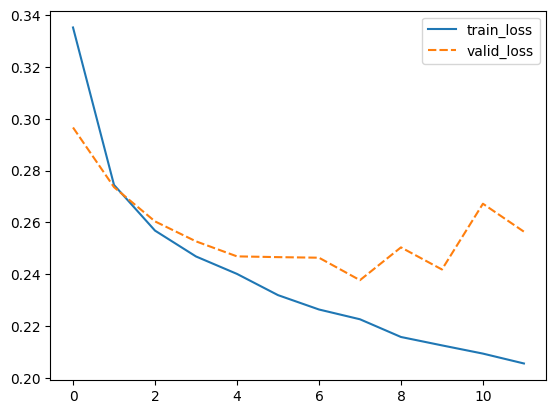

In [82]:
plot_loss(loss_train_hist, loss_valid_hist)

In [83]:
evaluate_model(testloader, model)

,accuracy,recall,precision,f1_scor,auc
0,0.891368,0.848149,0.92815,0.886348,0.96488


In [84]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
num_epochs = 12
loss_train_hist, loss_valid_hist = training(model, criterion, optimizer, num_epochs, trainloader_1, validloader)

100%|██████████| 12/12 [06:59<00:00, 34.92s/it]


In [85]:
evaluate_model(testloader, model)

,accuracy,recall,precision,f1_scor,auc
0,0.625814,0.353021,0.775436,0.485167,0.726593


Дообучение на других таргентом антителе только мешает. 


##### Посмотрю что вообще какие данные лежат в train_target

In [86]:
train_target

,junction_aa,v_call,consensus_count,j_call,clonal_frequency,Label,Distance,Antibody,repr
104975,CCRGFNCYVPLMNYGFWRTSGVGY,IGHV_RBD,1,IGHJ_RBD,0.000008,0,9,REGN33,"[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
145322,EIRGFNCYCPLYRYGFWPTNGRNW,IGHV_RBD,1,IGHJ_RBD,0.000008,0,10,REGN33,"[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,..."
128872,KNTGFNCYEPLSTYGFWRTVGLGY,IGHV_RBD,2,IGHJ_RBD,0.000015,0,8,REGN33,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
54774,KNEGFNCYGPIVQYGFWTTSGRDY,IGHV_RBD,2,IGHJ_RBD,0.000015,1,9,REGN33,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
49358,KNTGFNCYPPIATYGFWPTGGIGW,IGHV_RBD,1,IGHJ_RBD,0.000007,1,9,REGN33,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
...,...,...,...,...,...,...,...,...,...
124815,LATGFNCYAPIVAYGFHPTGGRSY,IGHV_RBD,1,IGHJ_RBD,0.000007,1,11,REGN33,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
38176,KNQGFNCYVPLLRYGFWRTAGIGW,IGHV_RBD,1,IGHJ_RBD,0.000008,0,9,REGN33,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
70457,LNRGFNCYKPLQGYGFWRTSGKGW,IGHV_RBD,1,IGHJ_RBD,0.000008,0,9,REGN33,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
27457,VTGGFNCYAPLVRYGFQRTMGIGW,IGHV_RBD,1,IGHJ_RBD,0.000007,1,10,REGN33,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [89]:
train_target.Distance.value_counts()

Distance
9     8386
10    5460
8     5262
7     2100
11    2096
12     538
6      486
3      308
4      113
2       90
5       85
13      70
14       4
1        2
Name: count, dtype: int64

In [93]:
target_test.Distance.value_counts()

Distance
9     4465
10    2963
8     2673
11    1165
7     1150
12     302
6      276
3      170
5       53
4       51
13      47
2       41
14       1
Name: count, dtype: int64

In [96]:
train_target.iloc[:17000, :].Distance.value_counts()

Distance
9     5683
10    3735
8     3590
7     1417
11    1410
12     369
6      331
3      198
4       78
2       69
5       61
13      53
14       4
1        2
Name: count, dtype: int64